In [1]:
import torch as tc
tc.set_default_tensor_type(tc.DoubleTensor)

In [2]:
from __future__ import division
import sys, platform, os

import numpy as np
import scipy as sp
from scipy.optimize import root

import MyHyperSphericaljl as jl
import MyOtherFunctions as fun

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

In [28]:
h = 0.673
ns = 0.966
As = 2e-9
ks = 0.05 # 1/Mpc
c_light = 2.88792458e5 # m/s
OmegaK = -0.05
KK = -(h*100/c_light)**2 * OmegaK
Kscale = np.sqrt(np.abs(KK)) # 1/Mpc
l_max = 2000

print('The scale of K is ', Kscale, '/ Mpc')

The scale of K is  5.2109177617698e-05 / Mpc


In [11]:
pars = camb.set_params(H0=100*h, ombh2=0.0223828, omch2=0.1201075, mnu=6.451439e-04, omk=OmegaK, tau=0.05430842, As=As, ns=ns, halofit_version='mead', lmax=4000)

einstein_solu_data = camb.CAMBdata()
einstein_solu_data.set_params(pars)
einstein_solu_data.calc_background(pars)

In [17]:
nulist = np.arange(5, 10000, 1)
# nulist = np.array([100, 1000, 10000, 40000])
nulist = np.array(nulist, dtype='int64')
klist = Kscale * np.sqrt(nulist**2 - 1)

eta_in = einstein_solu_data.conformal_time(1e8)
eta_0 = einstein_solu_data.conformal_time(0)

# lgetalist = np.linspace(np.log10(eta_in), np.log10(eta_0), 1000, endpoint=True)
# start at np.log10(eta_in) is not enough for super-horizon modes
lgetalist = np.linspace(-3.5, np.log10(eta_0), 1000, endpoint=True)
etalist = 10**lgetalist

x_in = eta_in * Kscale
x_0 = eta_0 * Kscale
binlist = np.where(nulist<1000, 1000, nulist)

print('The smallest length scale is ', eta_in, 'Mpc (initial condition), corresponding x =', x_in)
print('The largest length scale is ', eta_0, 'Mpc (nowadays), corresponding x =', x_0)

The smallest length scale is  0.00463548200481885 Mpc (initial condition), corresponding x = 2.4155115513274827e-07
The largest length scale is  14345.198869731134 Mpc (nowadays), corresponding x = 0.7475165158640202


In [57]:
res = np.load('C_l_withKgt0_2000.npy')

In [58]:
l_array = np.arange(l_max)
l_matrix = np.repeat([l_array], len(res), axis=0)

k_matrix = np.repeat([nulist], l_max, axis=0).T

In [63]:
res_normalized = l_matrix * (l_matrix + 1) * res * k_matrix**(ns - 1)

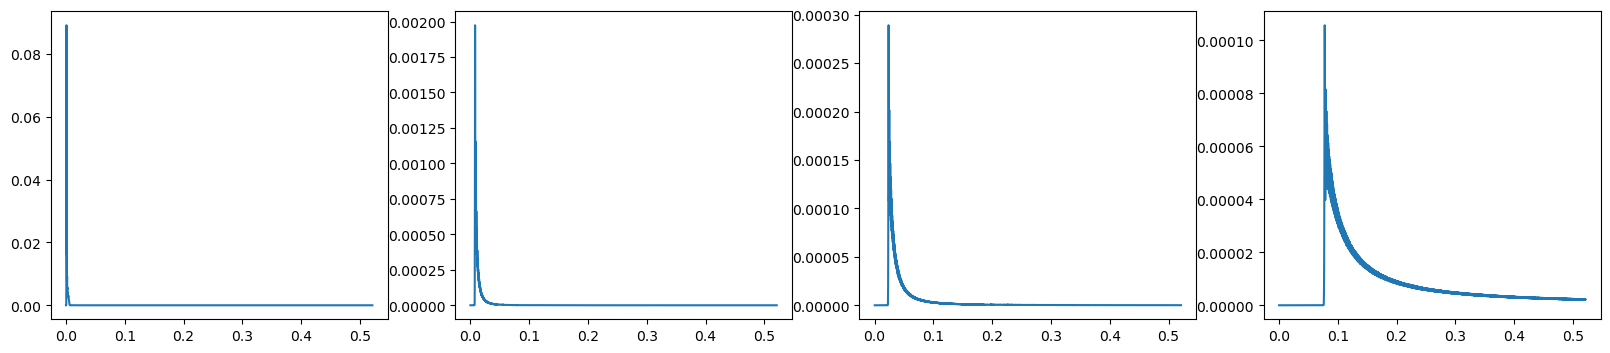

In [64]:
fig = plt.figure(figsize=(20,4))

plt.subplot(141)
plt.plot(klist, res_normalized[:, 10], '-')

plt.subplot(142)
plt.plot(klist, res_normalized[:, 100], '-')

plt.subplot(143)
plt.plot(klist, res_normalized[:, 300], '-')

plt.subplot(144)
plt.plot(klist, res_normalized[:, 1000], '-')

plt.show()

In [65]:
D_l = np.sum(res_normalized, axis=0) * As * ks**(1-ns)

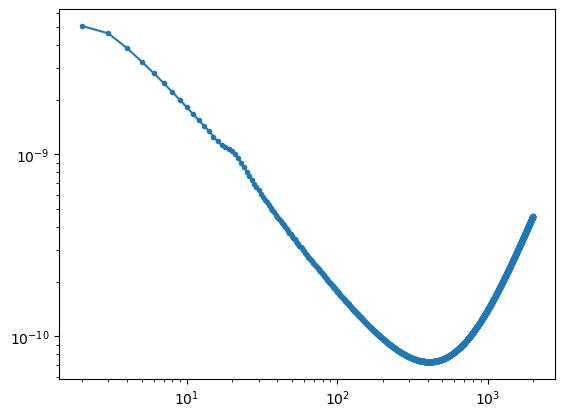

In [67]:
lend = -1

plt.loglog(l_array[2:lend], D_l[2:lend], '.-')
# plt.xscale('log')

(1e-10, 0.01)

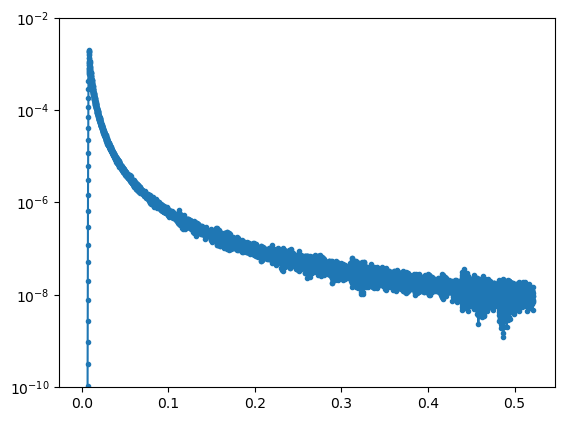

In [88]:
plt.plot(klist, res_normalized[:, 100], '.-')

plt.yscale('log')
plt.ylim([1e-10,1e-2])
# plt.ylim([1e-5,1e-4])
# plt.xlim([0.1,0.11])

In [78]:
res_normalized[:, 200].shape

(9995,)

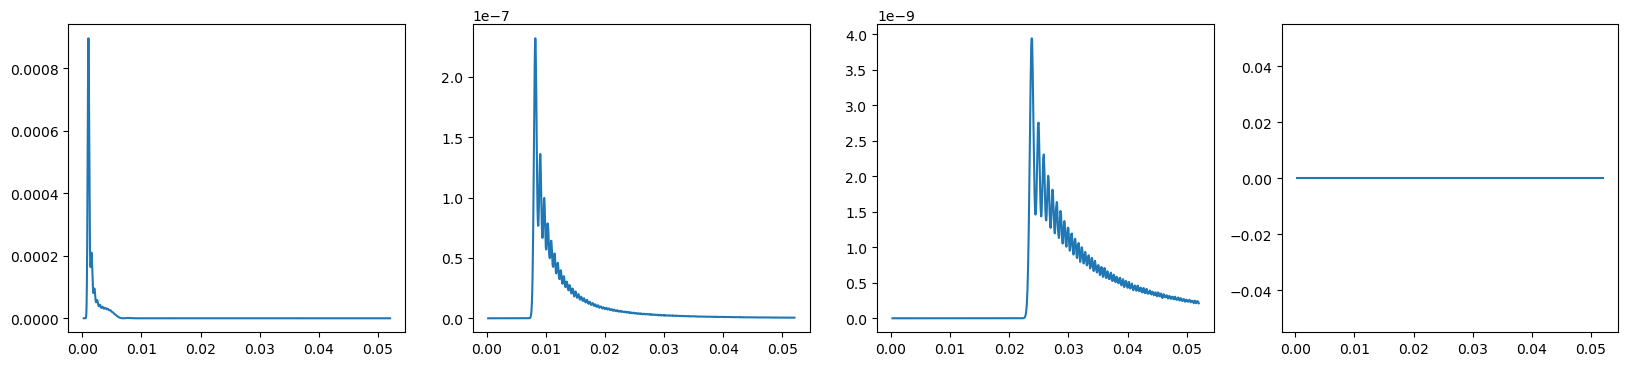

In [15]:
fig = plt.figure(figsize=(20,4))

plt.subplot(141)
plt.plot(klist, res[:, 10], '-')

plt.subplot(142)
plt.plot(klist, res[:, 100], '-')

plt.subplot(143)
plt.plot(klist, res[:, 300], '-')

plt.subplot(144)
plt.plot(klist, res[:, 1000], '-')

plt.show()

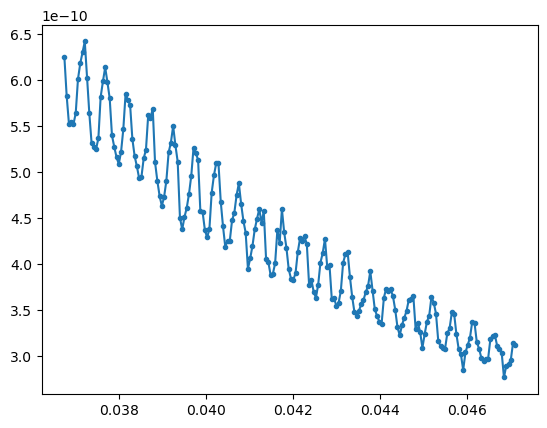

In [23]:
ki = 700
ke = 900

plt.plot(klist[ki:ke], res[ki:ke, 300], '.-')
# plt.xlim([0.035,0.05])

In [25]:
np.save('C_l_not_normalized.npy', np.array(res))

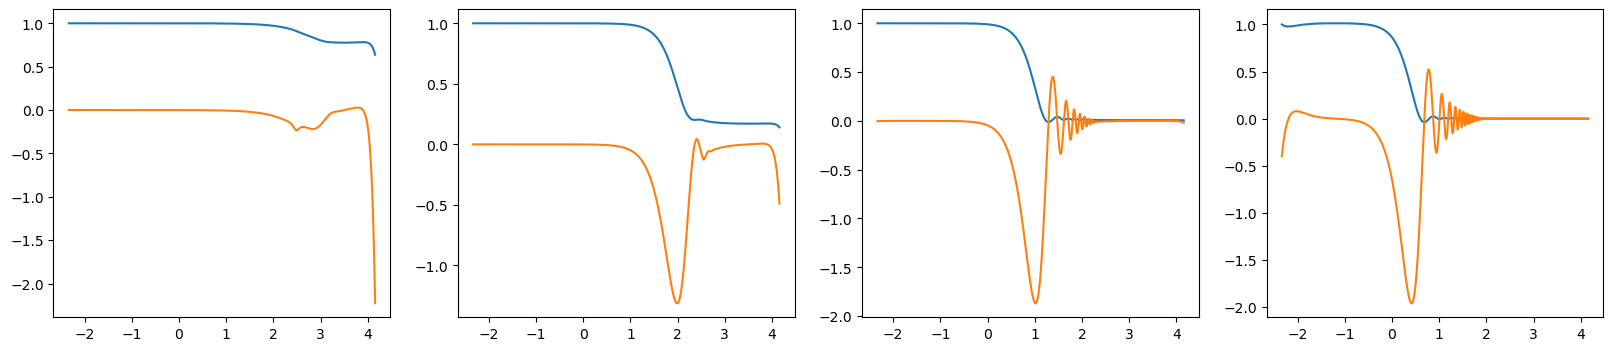

In [20]:
fig = plt.figure(figsize=(20,4))

plt.subplot(141)
plt.plot(lgetalist, plots[0,0], '-')
plt.plot(lgetalist, plots[0,1], '-')
# plt.xlim([-3,1])

plt.subplot(142)
plt.plot(lgetalist, plots[1,0], '-')
plt.plot(lgetalist, plots[1,1], '-')
# plt.xlim([-3,1])

plt.subplot(143)
plt.plot(lgetalist, plots[2,0], '-')
plt.plot(lgetalist, plots[2,1], '-')
# plt.xlim([-3,1])

plt.subplot(144)
plt.plot(lgetalist, plots[3,0], '-')
plt.plot(lgetalist, plots[3,1], '-')
# plt.xlim([-3,1])

plt.show()

In [7]:
# lgetalist = np.linspace(np.log10(eta_in), np.log10(eta_0), 1000, endpoint=True)
lgetalist = np.linspace(-3,5, 1000, endpoint=True)
etalist = 10**lgetalist

print(lgetalist[0], '  ', lgetalist[-1])

testk = Kscale * np.sqrt(40000**2 - 1)

Weylk = einstein_solu_data.get_time_evolution(q=testk, eta=etalist, vars=['Weyl'], frame='Newtonian')[:,0]

plt.plot(etalist, Weylk, '-')
plt.xscale('log')

-3.0    5.0


In [67]:


# etalist = np.concatenate([10**np.linspace(np.log10(xstart), np.log10(xmid), 20, endpoint=False), np.linspace(xmid, xend, 5000 * 2, endpoint=True)])

etalist = np.linspace(xstart, xend, 100000, endpoint=True)
xlist = etalist * Kscale

In [78]:
Weylk = einstein_solu_data.get_time_evolution(q=klist[-2], eta=etalist, vars=['Weyl'], frame='Newtonian')[:,0]
index0 = (Weylk.nonzero())[0][0]
Psi_normalized = Weylk
Psi_normalized[:index0] = 1 
Psi_normalized[index0:] = Weylk[index0:] / Weylk[index0]
# etalist = tc.tensor(etalist)
# Psi_normalized = tc.tensor(Psi_normalized)

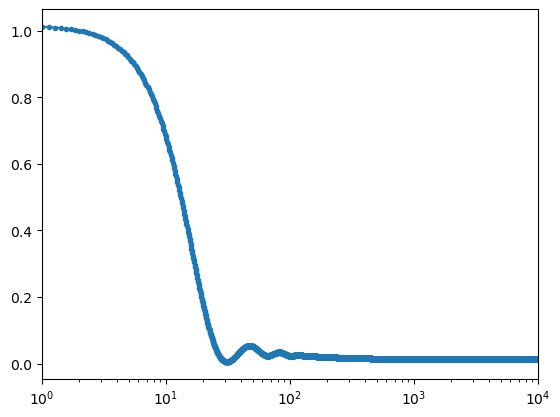

In [80]:
psi_0 = Psi_normalized

plt.plot(etalist, psi_0, '.-')

plt.xscale('log')
plt.xlim([1, 10000])

plt.show()